In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df=pd.read_csv("C:/Users/RUTUJA/Desktop/ML Sunbeam/dataset/heart_disease.csv")


In [2]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
x=df.drop('target',axis=1)#dataframe
y=df['target']#series

In [5]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=123455677)

classifier=LogisticRegressionCV(max_iter=1000)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [6]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy=accuracy_score(y_test,y_pred)
print(f"{accuracy*100:.2f}%")


91.80%


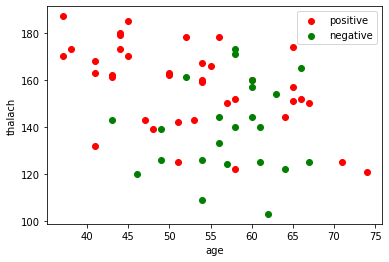

In [29]:
plt.scatter(x_test['age'][y_pred==1],x_test['thalach'][y_pred==1],color='red',label="positive")
plt.scatter(x_test['age'][y_pred==0],x_test['thalach'][y_pred==0],color='green',label="negative")

plt.xlabel("age")
plt.ylabel("thalach")
plt.legend()


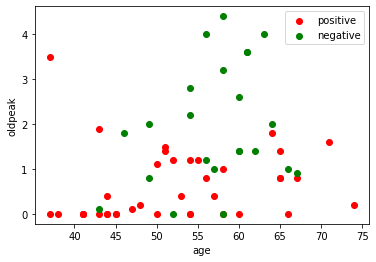

In [30]:
plt.scatter(x_test['age'][y_pred==1],x_test['oldpeak'][y_pred==1],color='red',label="positive")
plt.scatter(x_test['age'][y_pred==0],x_test['oldpeak'][y_pred==0],color='green',label="negative")

plt.xlabel("age")
plt.ylabel("oldpeak")
plt.legend()


In [27]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.89      0.97      0.93        35

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



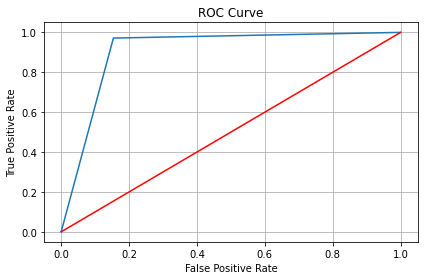

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot (fpr, tpr)
plt.plot([0, 1], [0, 1], color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')
plt.tight_layout()
plt.grid()